<a href="https://colab.research.google.com/github/Jithendrasa/hack_challenge/blob/main/ibmhackchallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('/content/saibaba.csv')


In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.drop("sl_no",axis=1,inplace=True)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [ ]:
df.shape

(215, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
# Check null values in data
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# check Duplicet values in data
df.duplicated().sum()


0

In [ ]:
# Handel the null value in salary we can use median to fill nan
df["salary"] = df["salary"].fillna(np.nanmedian(df["salary"]))

In [ ]:
df['gender']=df['gender'].replace({'M':1,'F':0})

In [ ]:
# Separate categorical and numerical data
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation',
       'status'],
      dtype='object')
Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')


In [ ]:
# Check unique value in categorical data
for i in categorical_features:
    print(i,df[i].unique())
    print("="*50)

ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex ['No' 'Yes']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


In [ ]:
# Check value count of categorical data
for i in categorical_features:
    print(i,df[i].value_counts())
    print("="*50)


 **EDA**
 UNIVARIATE ANALYSIS

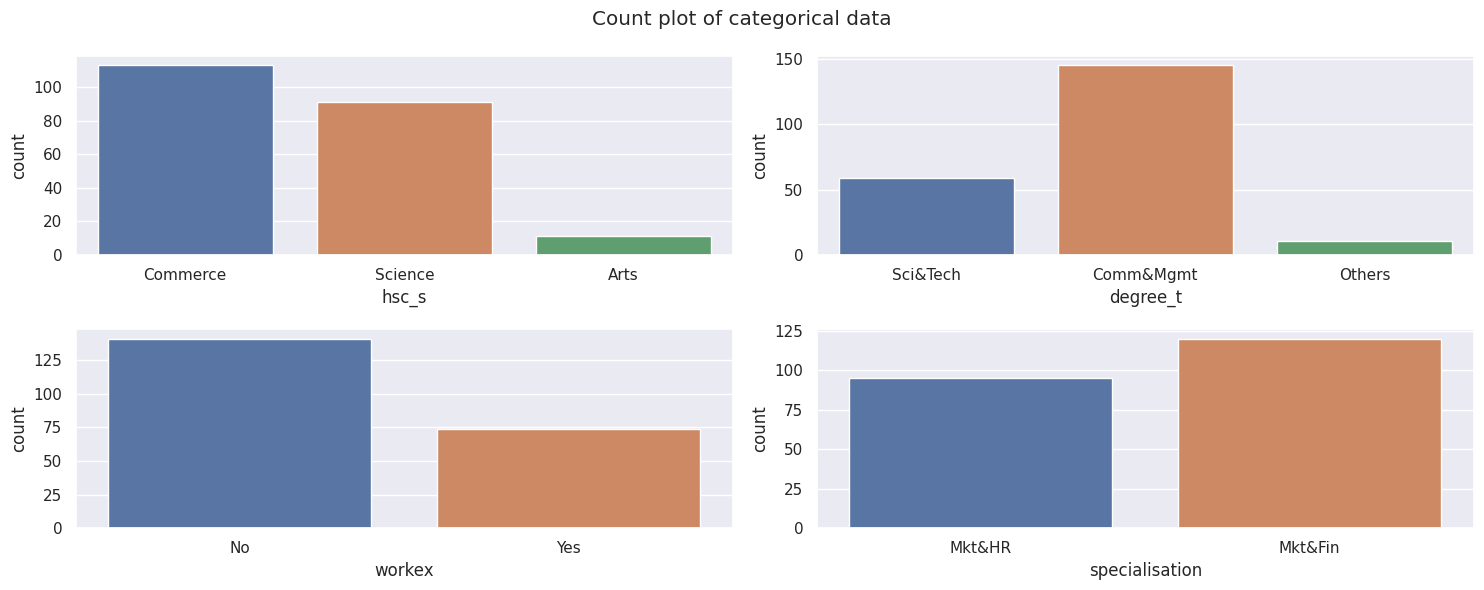

In [ ]:
cati = ['hsc_s', 'degree_t', 'workex', 'specialisation']
try:
    plt.suptitle("Count plot of categorical data")
    for i in range(0,len(cati)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=df[cati[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: xlabel='gender'>

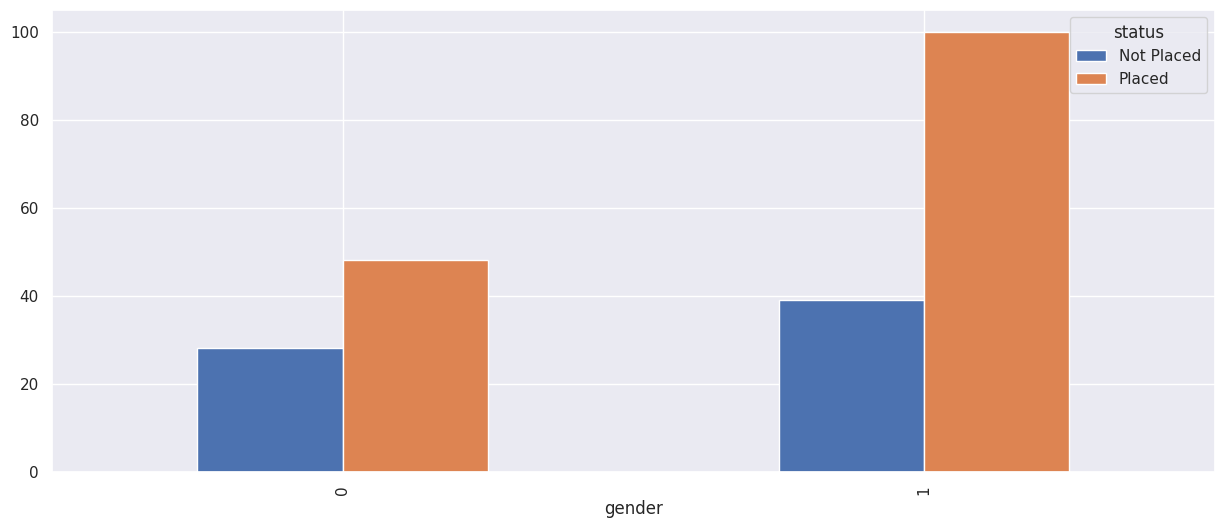

In [ ]:
gender = pd.crosstab(df["gender"],df["status"])
gender.plot(kind="bar")

<Axes: xlabel='hsc_s'>

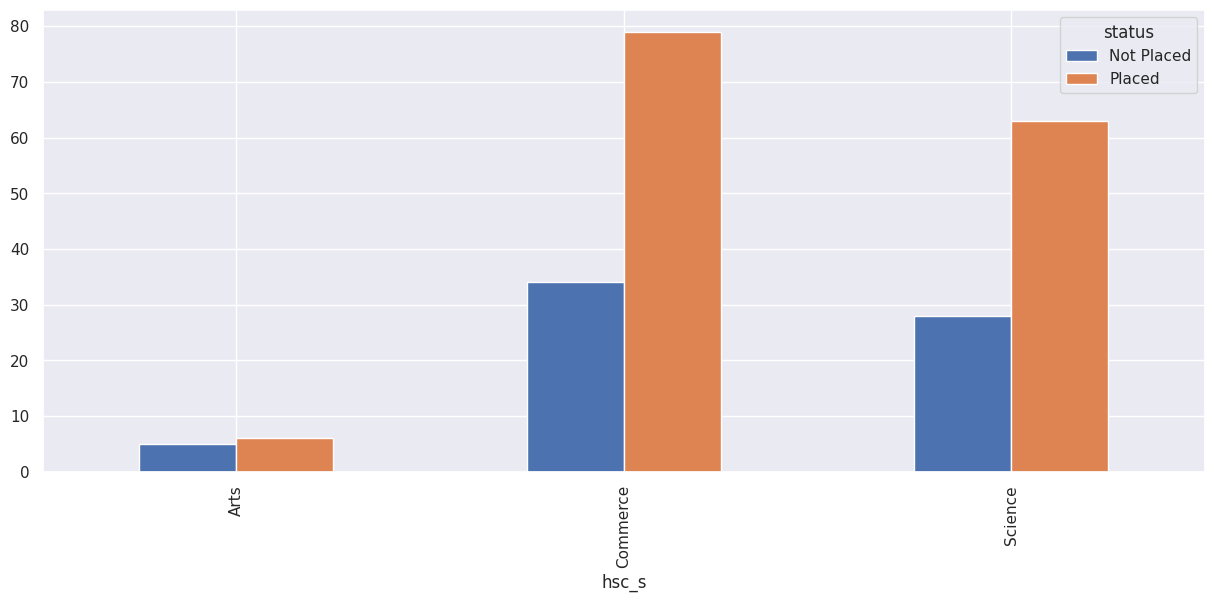

In [ ]:
secondry_school = pd.crosstab(df["hsc_s"],df["status"])
secondry_school.plot(kind="bar")

<Axes: xlabel='degree_t'>

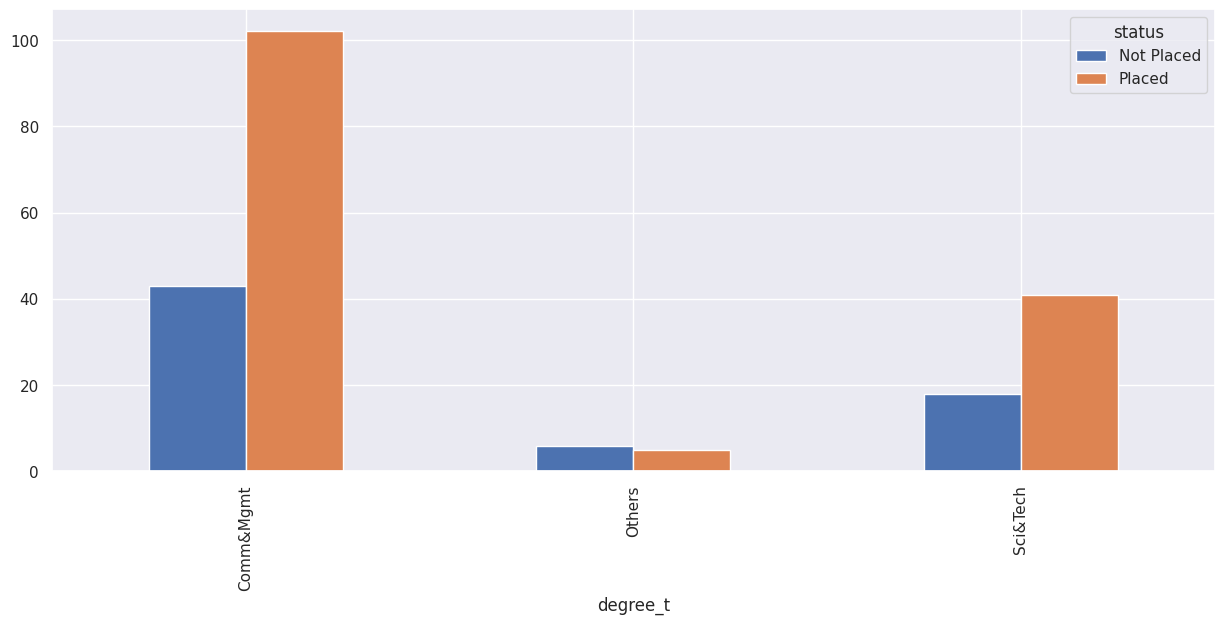

In [ ]:
degree = pd.crosstab(df["degree_t"],df["status"])
degree.plot(kind="bar")

<Axes: xlabel='workex'>

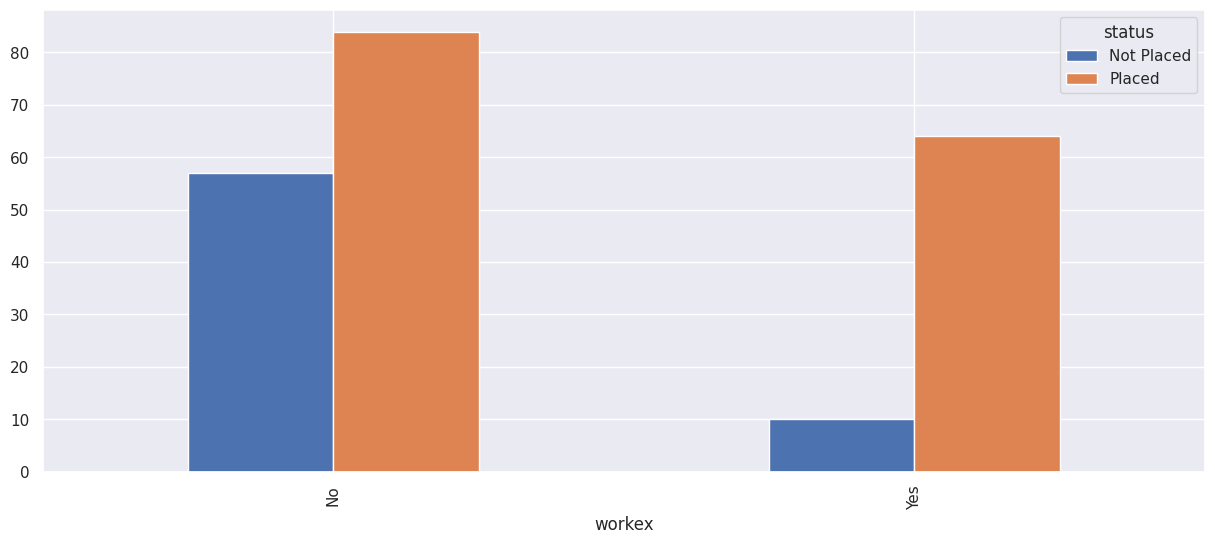

In [ ]:
work_experience = pd.crosstab(df["workex"],df["status"])
work_experience.plot(kind="bar")

<Axes: xlabel='specialisation'>

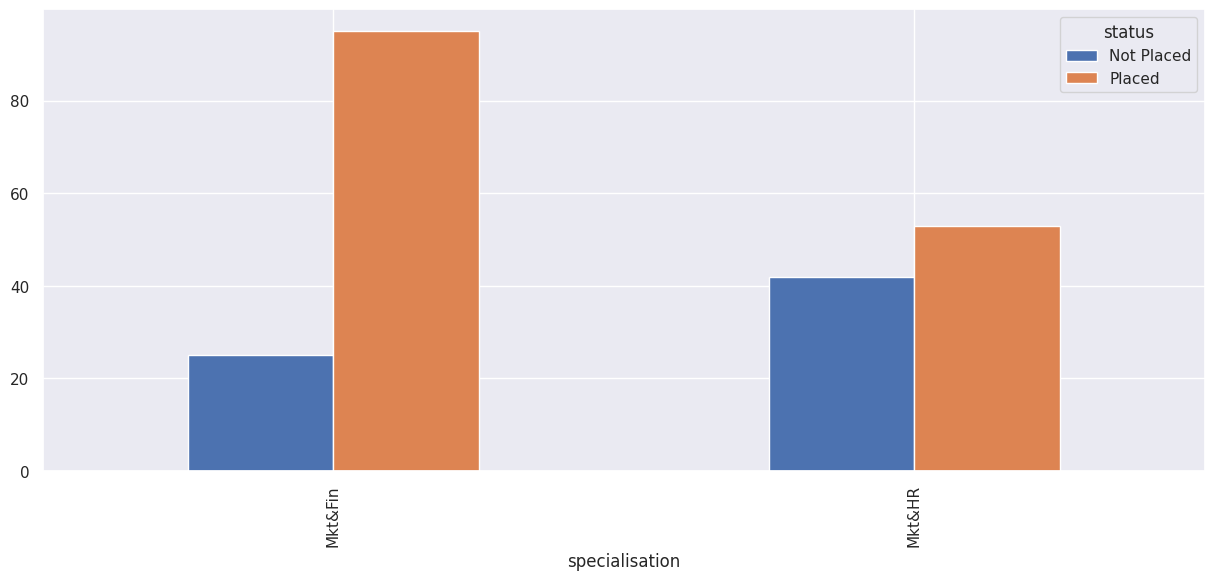

In [ ]:
specialisation = pd.crosstab(df["specialisation"],df["status"])
specialisation.plot(kind="bar")

<Axes: ylabel='status'>

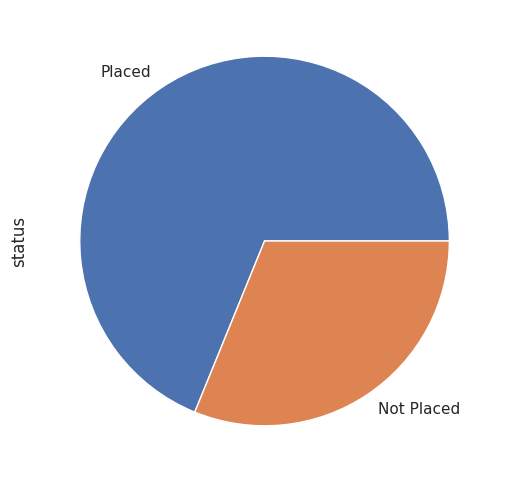

In [ ]:
df["status"].value_counts().plot.pie()

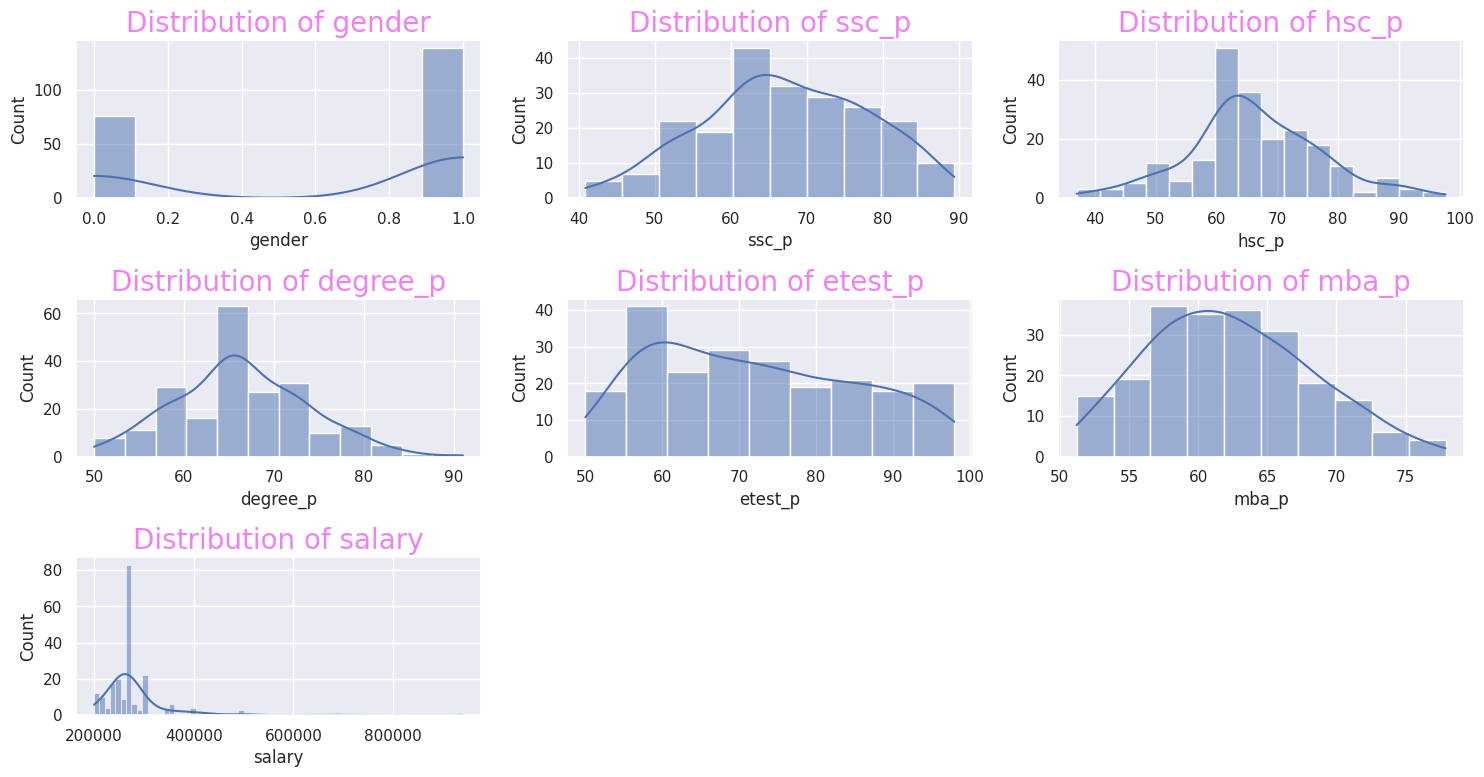

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}",fontdict= {'fontsize':20,'color':'violet'})
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

 **BIVARIATE ANALYSIS**

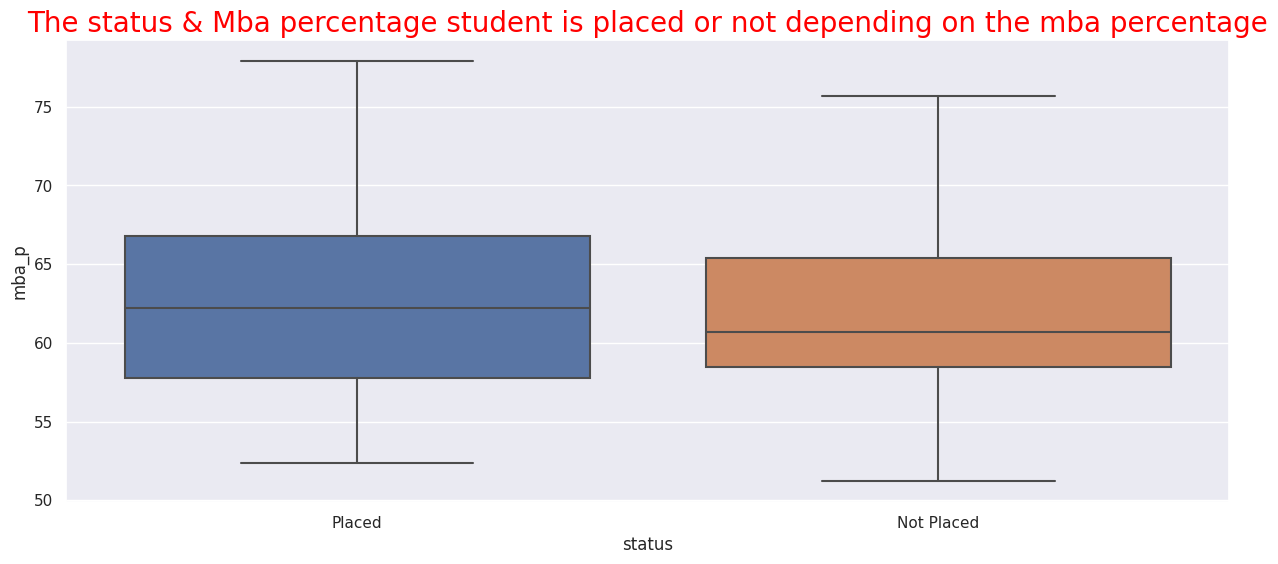

In [ ]:
sns.boxplot(x=df.status,y=df.mba_p)
plt.title("The status & Mba percentage student is placed or not depending on the mba percentage",color='red',size=20)
plt.show()

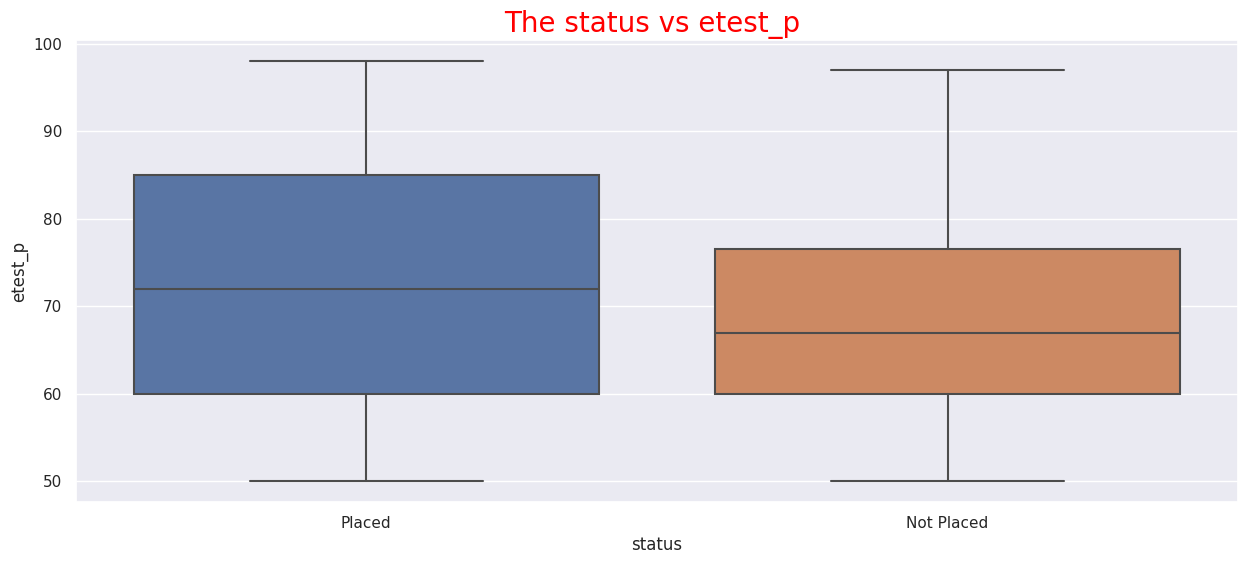

In [ ]:
sns.boxplot(x=df.status,y=df.etest_p	)
plt.title("The status vs etest_p ",color='red',size=20)
plt.show()

In [ ]:
# Drop Usless Columns from data
df.drop(['salary', 'gender', 'ssc_b', 'hsc_b'],axis=1,inplace=True)

In [ ]:
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['hsc_s', 'degree_t', 'workex', 'specialisation', 'status'], dtype='object')
Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')


In [ ]:
# now we have to do labelencoding on catiforical data
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features = ['hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# loop through the categorical features and encode them
for i in categorical_features:
    le.fit(df[i])
    df[i] = le.transform(df[i])

** MULTIVARIATE ANALYSIS**

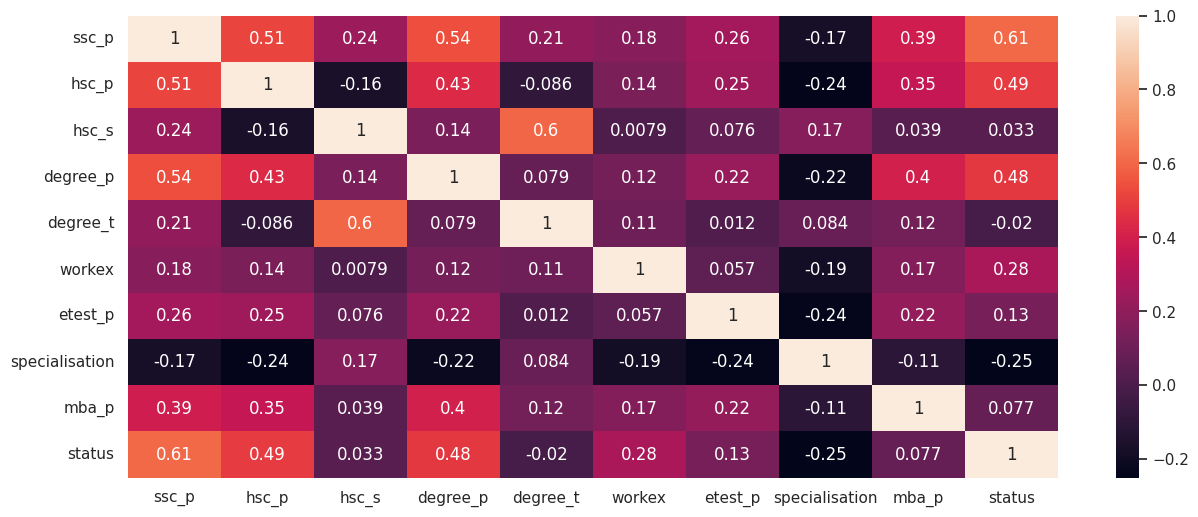

In [ ]:
# Correlation With arget colums
sns.heatmap(df.corr(),annot=True)
plt.show()

# HANDLING OUTLIERS

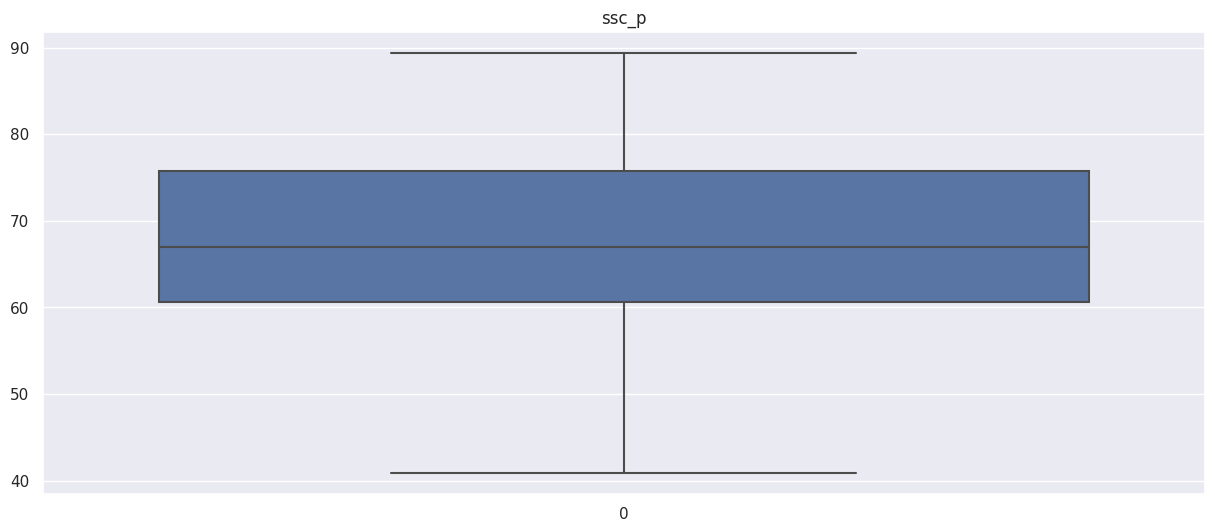

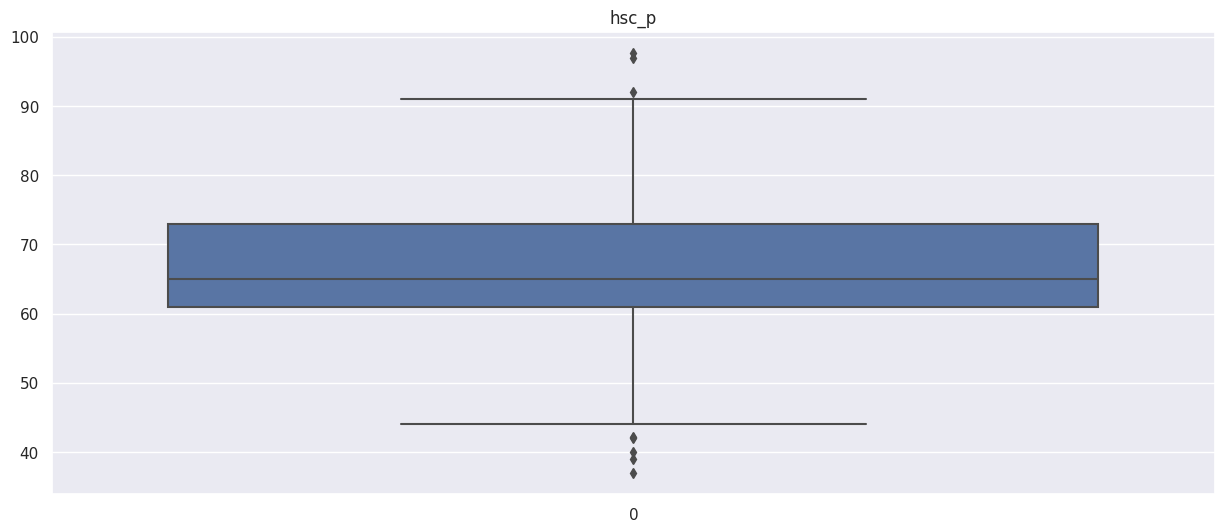

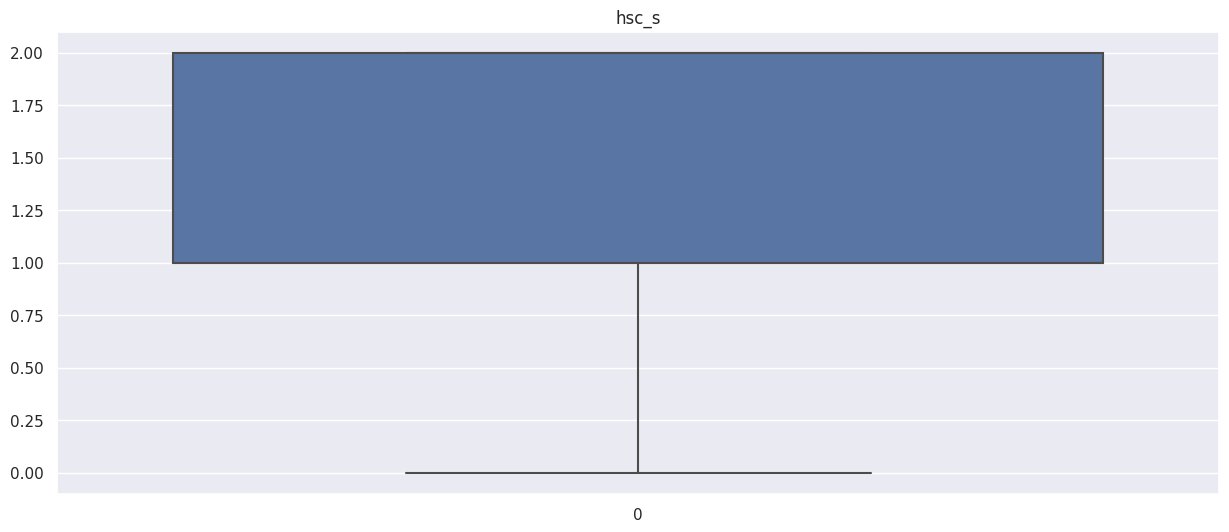

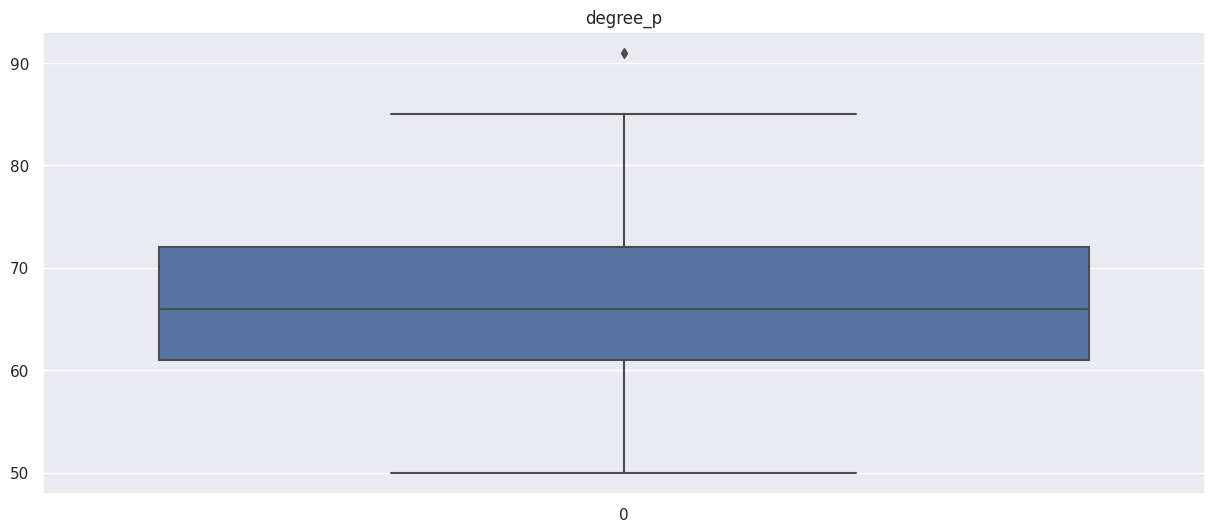

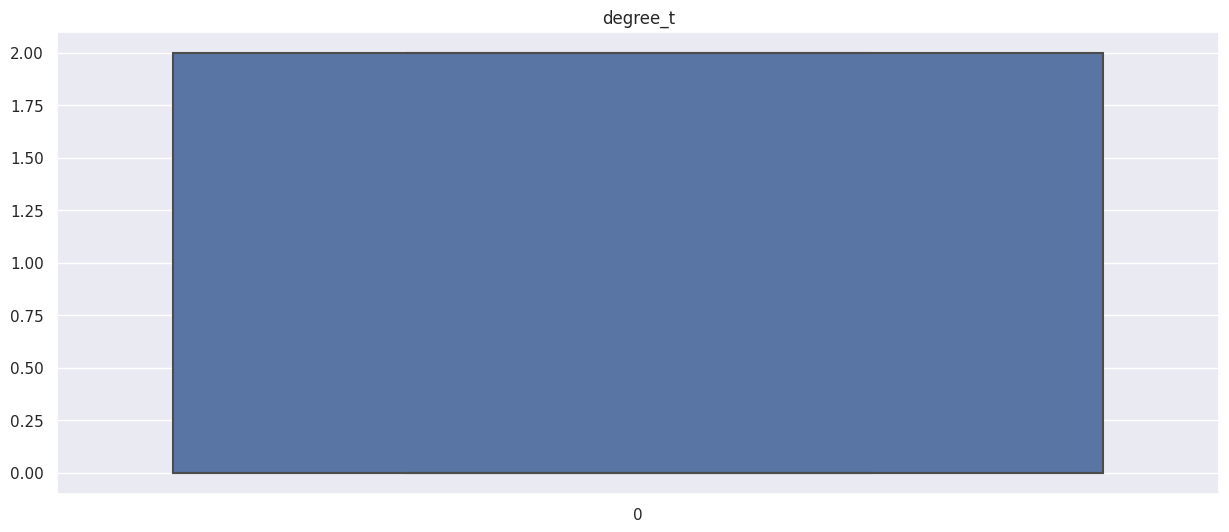

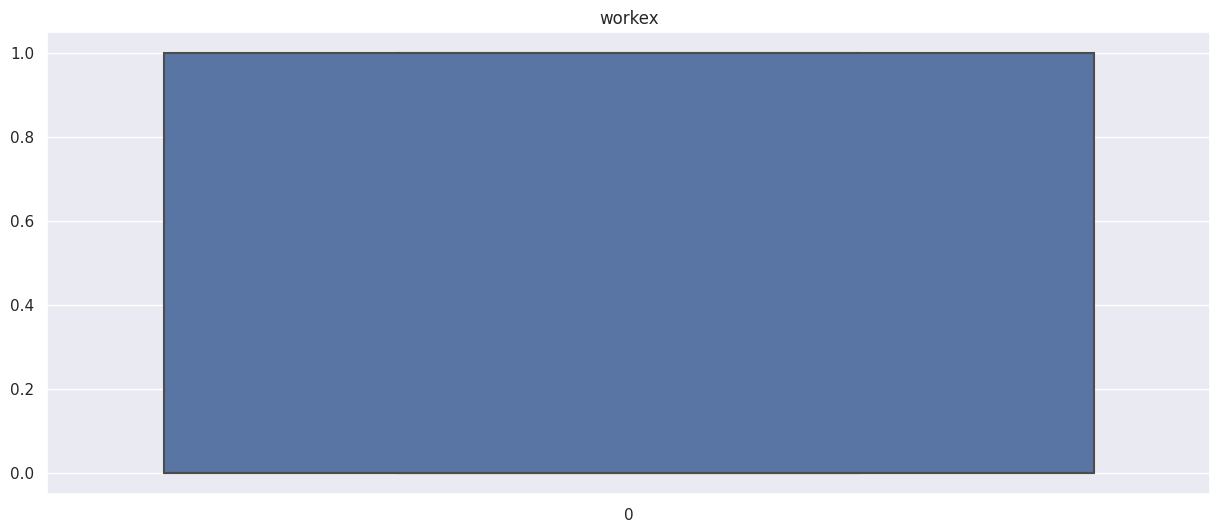

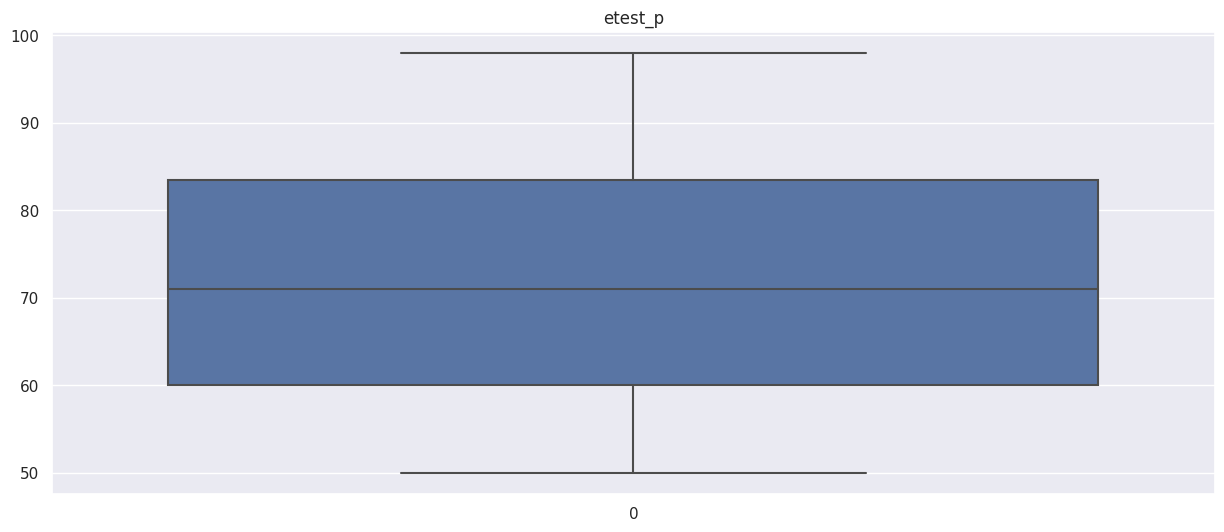

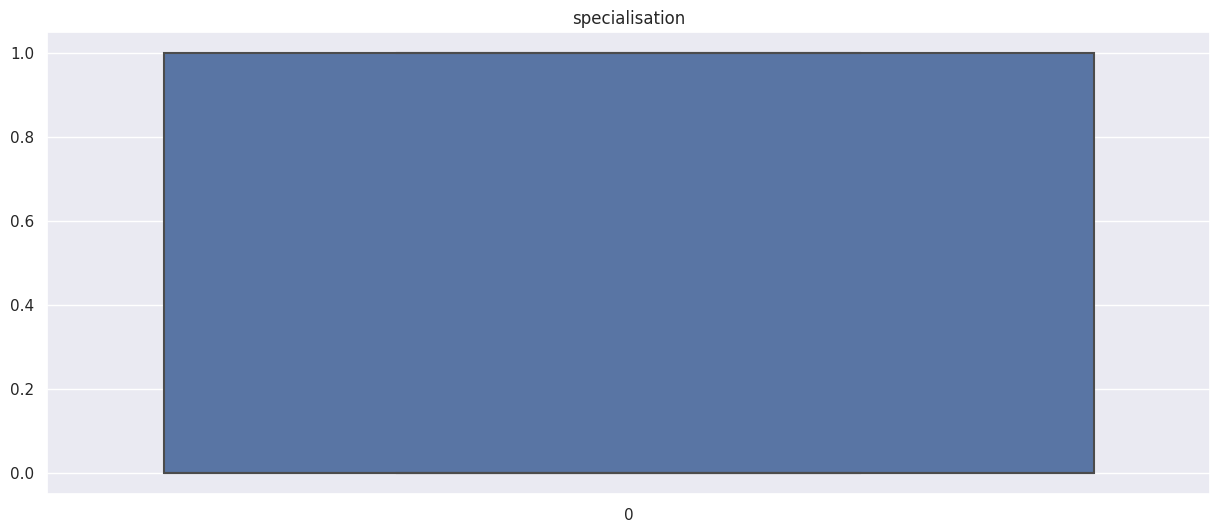

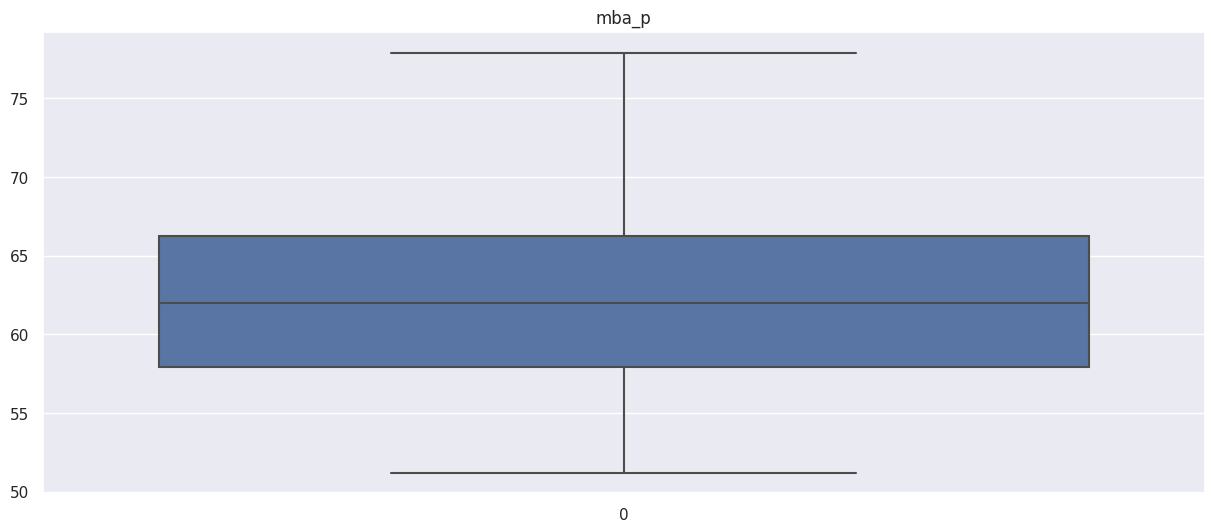

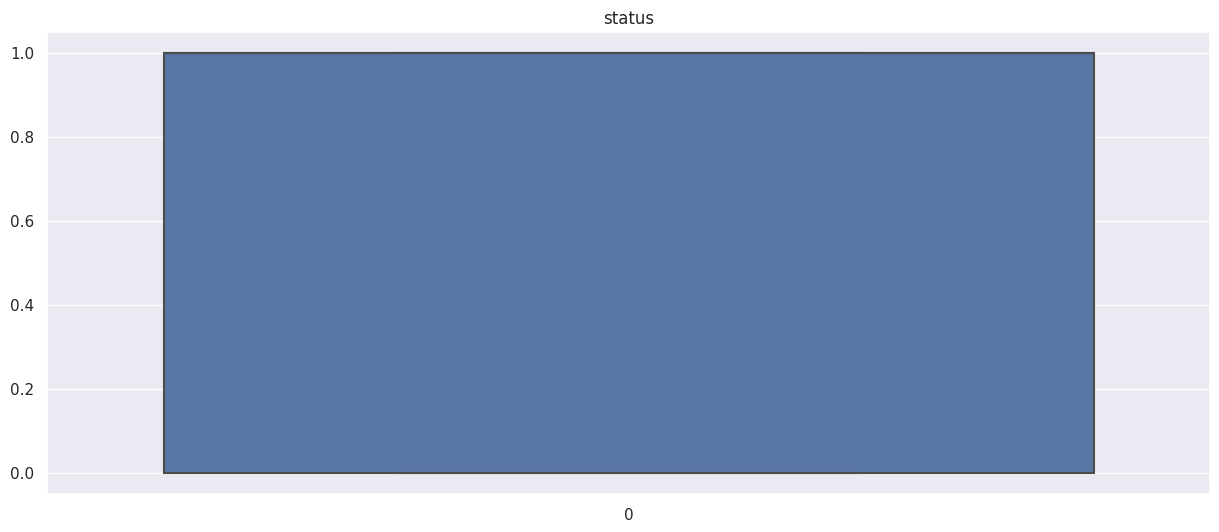

In [ ]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

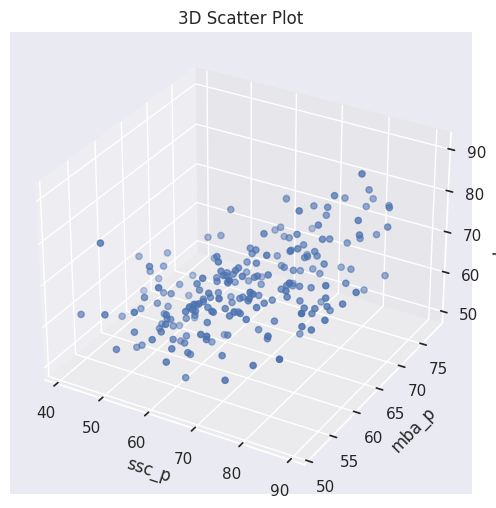

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df has columns 'x', 'y', and 'z'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['ssc_p'], df['mba_p'], df['degree_p'])
ax.set_xlabel('ssc_p')
ax.set_ylabel('mba_p')
ax.set_zlabel('degree_p')
ax.set_title('3D Scatter Plot')
plt.show()


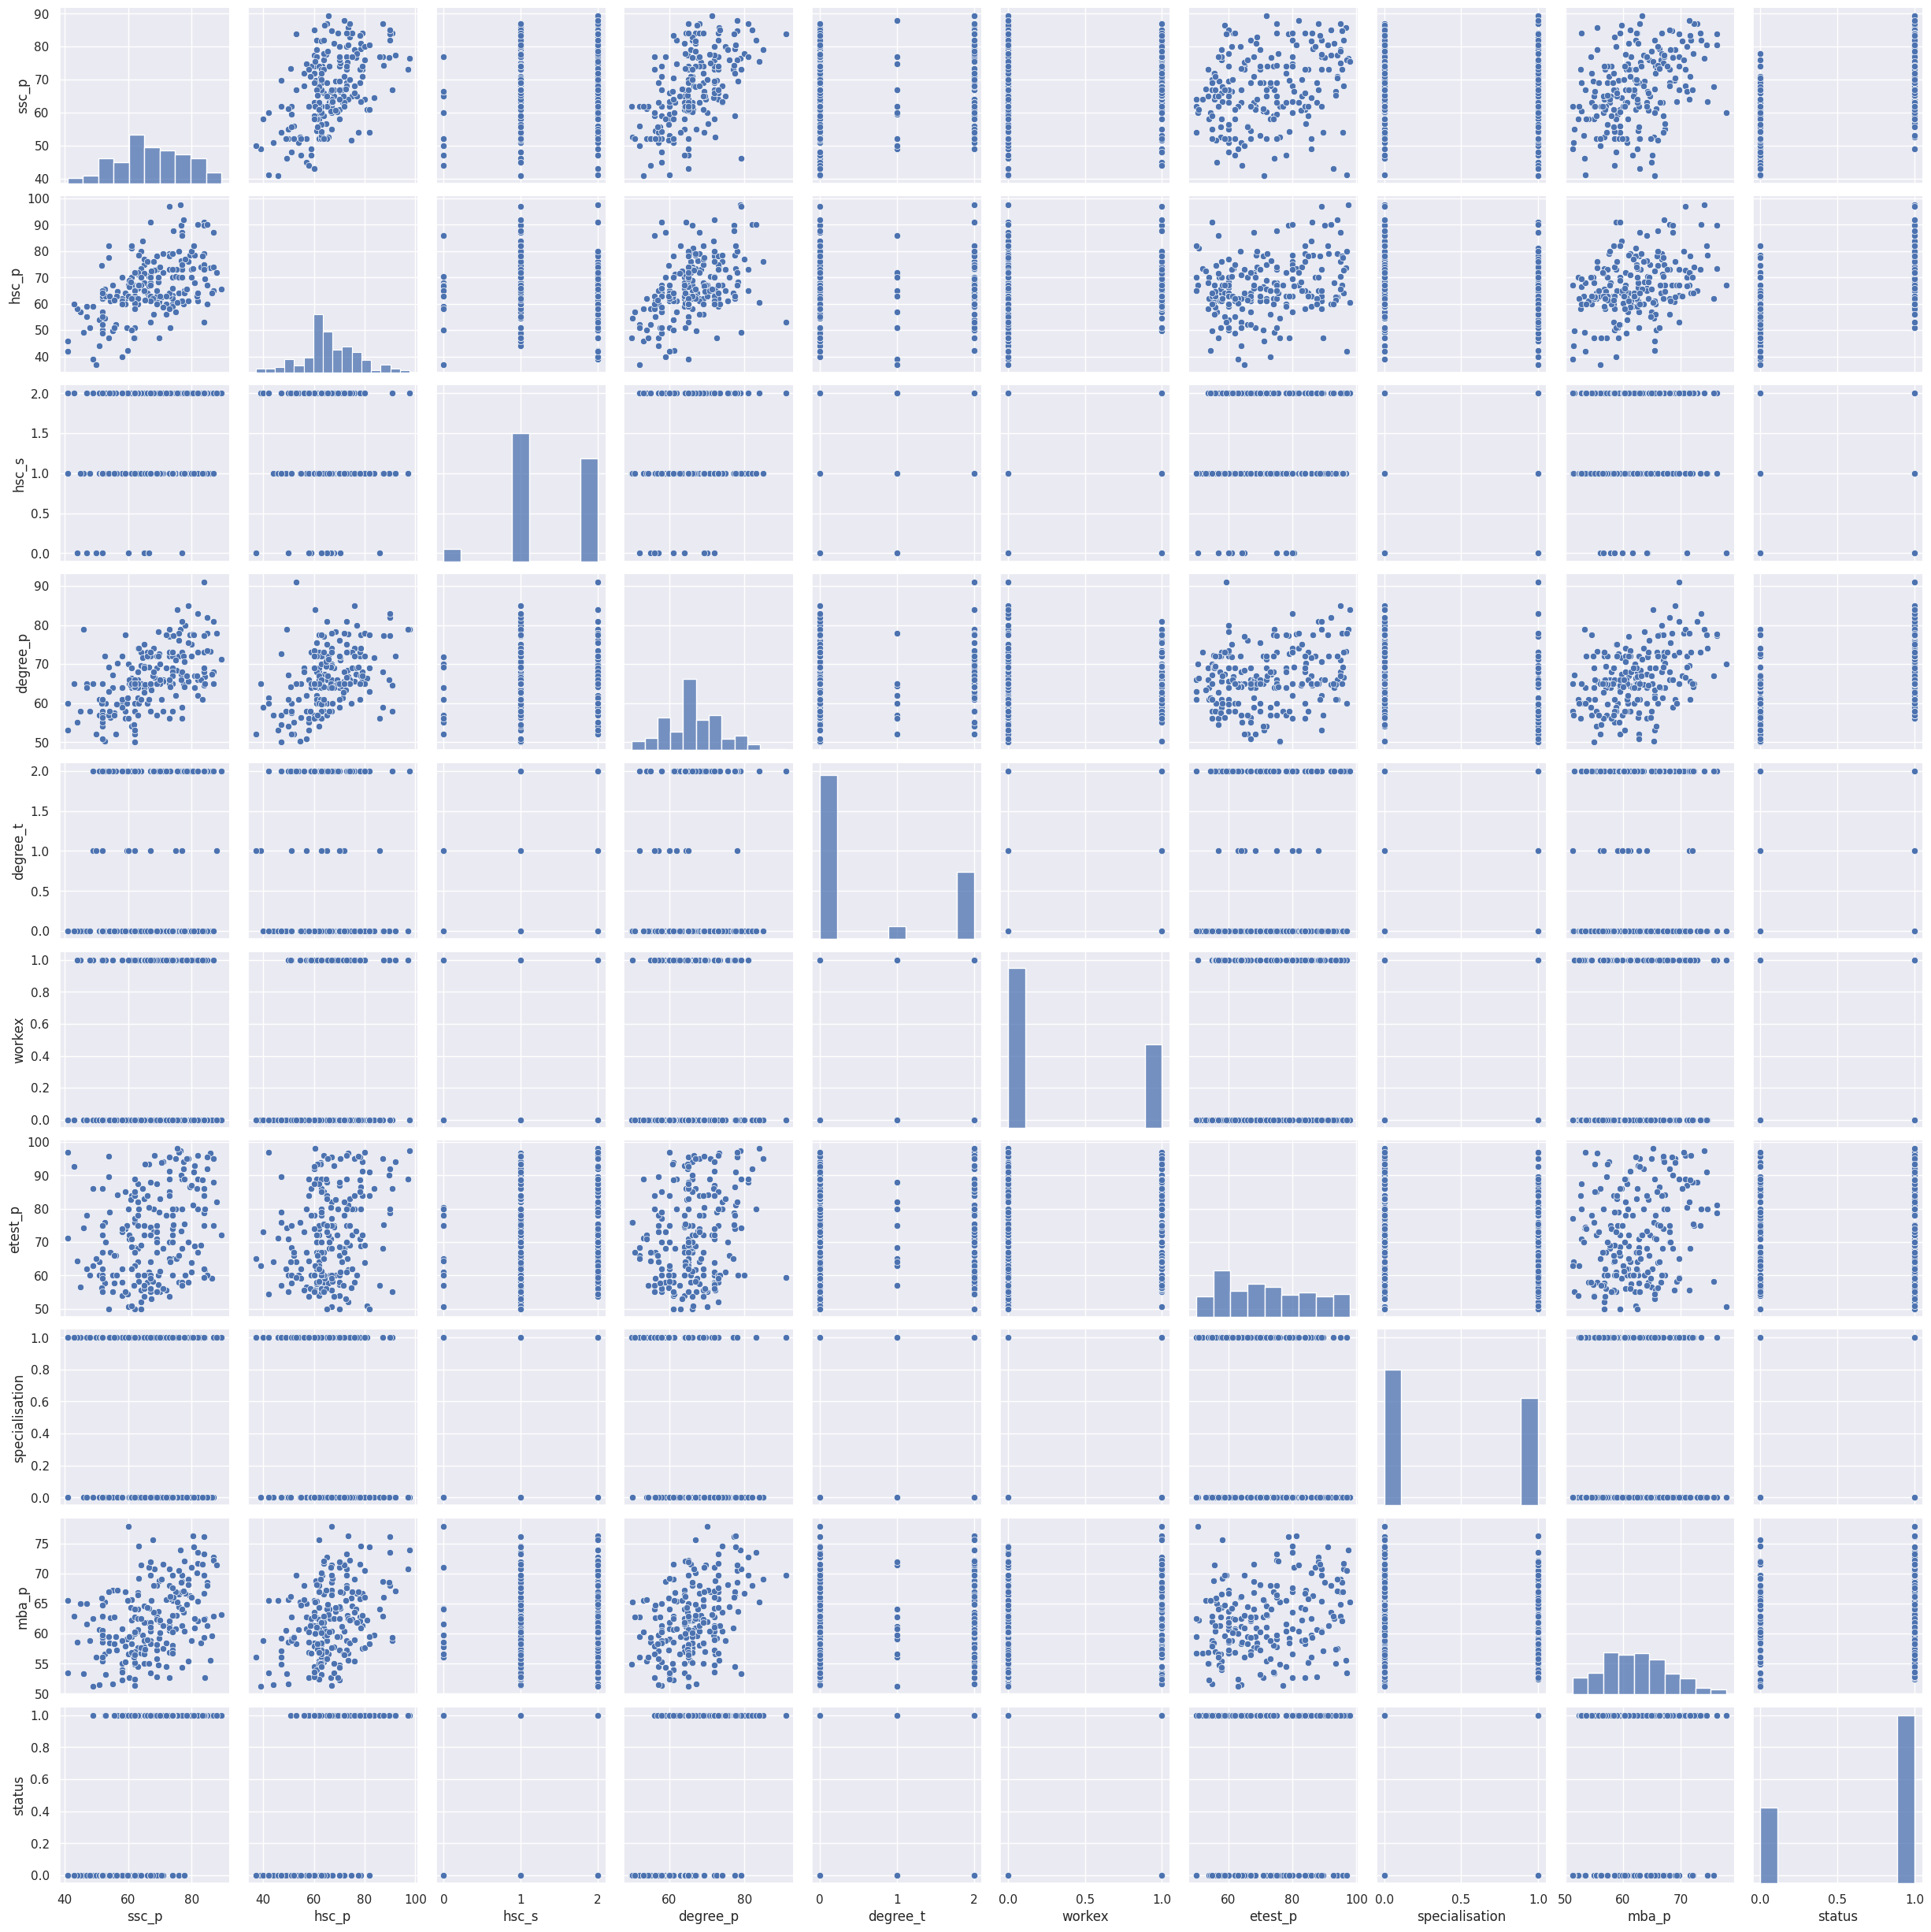

In [ ]:
a=sns.pairplot(df)

# MODEL TRANING

In [ ]:
df.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


HANDLING CATEGORICAL DATA

SPLITTING THE DATA

In [ ]:
x = df.drop("status",axis=1)
y = df["status"]

In [ ]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
##Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
## num_pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Create preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(172, 9)
(172,)
(43, 9)
(43,)


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [ ]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [ ]:
weights = {0:2,1:1}

**LOGASTIC REGRESSION**

In [ ]:
# logastic regression
logastic = LogisticRegression(class_weight=weights)

In [ ]:
logastic.fit(X_train,y_train)

LogisticRegression(class_weight={0: 2, 1: 1})

In [ ]:
logastic.score(X_train,y_train)*100

89.53488372093024

In [ ]:
y_predict = logastic.predict(X_test)
y_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
np.c_[x_test,y_test,y_pred]

array([[-0.58353984,  0.33726924, -0.64195452, -0.32284282, -0.67555009,
        -0.72444647, -0.27184187,  1.12390297, -0.47736773,  0.        ,
         1.        ],
       [ 0.61994138,  0.33726924,  1.08329825,  0.76683642, -0.67555009,
         1.38036423, -0.91359124, -0.88975652, -0.86569704,  1.        ,
         1.        ],
       [-0.02808697,  0.15331275, -0.64195452, -0.32284282, -0.67555009,
         1.38036423,  0.17360769,  1.12390297, -1.51004878,  1.        ,
         1.        ],
       [-0.7686908 , -0.39855669, -0.64195452,  1.5159909 , -0.67555009,
        -0.72444647,  0.14340772,  1.12390297,  0.81133574,  0.        ,
         1.        ],
       [-0.39838889, -0.01224808, -0.64195452, -0.10490697, -0.67555009,
         1.38036423, -0.91359124, -0.88975652,  0.04498674,  1.        ,
         1.        ],
       [-0.30581341,  0.35566489, -0.64195452, -0.73147253, -0.67555009,
        -0.72444647, -1.6685905 , -0.88975652,  0.03811365,  0.        ,
         0.   

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 9  3]
 [ 2 29]]
PRECISION_SCORE: 0.90625
RECALL_SCORE: 0.9354838709677419
F1_SCORE: 0.9206349206349206
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



**DECISION TREE**

In [ ]:
## Decision Tree
tree = DecisionTreeClassifier(class_weight="balanced")
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
tree.score(X_train,y_train)

1.0

In [ ]:
y_predict = tree.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 7  5]
 [ 4 27]]
PRECISION_SCORE: 0.84375
RECALL_SCORE: 0.8709677419354839
F1_SCORE: 0.8571428571428571
ACCURACY_SCORE: 0.7906976744186046


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.84      0.87      0.86        31

    accuracy                           0.79        43
   macro avg       0.74      0.73      0.73        43
weighted avg       0.79      0.79      0.79        43



**SUPPORT VECTOR CLASSIFIER**

In [ ]:
svm  = LinearSVC(class_weight="balanced")
svm.fit(X_train,y_train)

LinearSVC(class_weight='balanced')

In [ ]:
svm.score(X_train,y_train)

0.8837209302325582

In [ ]:
y_predict = svm.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 9  3]
 [ 1 30]]
PRECISION_SCORE: 0.9090909090909091
RECALL_SCORE: 0.967741935483871
F1_SCORE: 0.9374999999999999
ACCURACY_SCORE: 0.9069767441860465


(None, None, None, None, None)

**RANDOM FOREST**

In [ ]:
## Random Forest
forest = RandomForestClassifier(class_weight="balanced")
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
forest.score(X_train,y_train)

1.0

In [ ]:
y_predict = forest.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 7  5]
 [ 1 30]]
PRECISION_SCORE: 0.8571428571428571
RECALL_SCORE: 0.967741935483871
F1_SCORE: 0.909090909090909
ACCURACY_SCORE: 0.8604651162790697


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.86      0.97      0.91        31

    accuracy                           0.86        43
   macro avg       0.87      0.78      0.80        43
weighted avg       0.86      0.86      0.85        43



**HYPER TUNING**

In [ ]:
# Logestic Regression
logastic1 = LogisticRegression(random_state=42)
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10,10.1],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [ ]:
grid_search = GridSearchCV(estimator=logastic1,param_grid=params,cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10.1],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [ ]:
grid_search.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
grid_search.score(X_train,y_train)

0.9011627906976745

In [ ]:
y_predict = grid_search.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 9  3]
 [ 2 29]]
PRECISION_SCORE: 0.90625
RECALL_SCORE: 0.9354838709677419
F1_SCORE: 0.9206349206349206
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



In [ ]:
## Support vector clessfier
svm1 = LinearSVC(random_state=42)
params ={
    'C': [0.1, 1, 10],
    "penalty":["l1", "l2",],
    "loss":["hinge", "squared_hinge"],
    "class_weight":["balanced"],
}

In [ ]:
grid_search = GridSearchCV(estimator=svm1,param_grid=params,cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_search.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'loss': 'squared_hinge',
 'penalty': 'l2'}

In [ ]:
grid_search.score(X_train,y_train)

0.8372093023255814

In [ ]:
y_predict = grid_search.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 8  4]
 [ 1 30]]
PRECISION_SCORE: 0.8823529411764706
RECALL_SCORE: 0.967741935483871
F1_SCORE: 0.923076923076923
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.88      0.97      0.92        31

    accuracy                           0.88        43
   macro avg       0.89      0.82      0.84        43
weighted avg       0.88      0.88      0.88        43



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

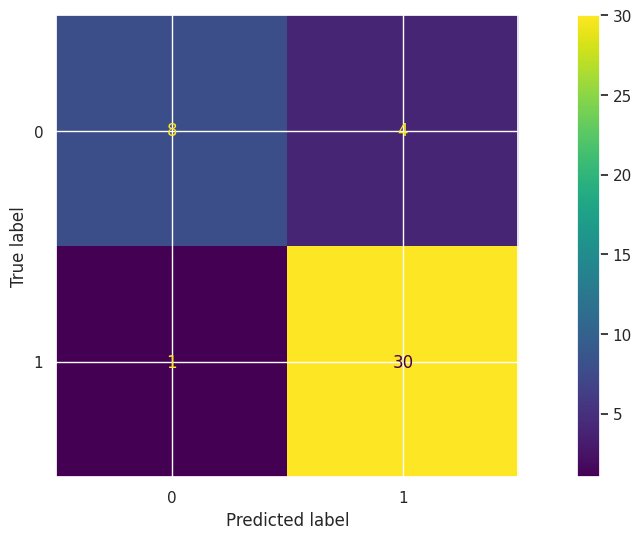

In [ ]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
## DEcision Tree
tree1 = DecisionTreeClassifier(random_state=42)
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,7,10],
    "min_samples_split":[3,4,5,6,7,8],
    "min_samples_leaf":[1,2,3,4,5,6],
    "max_features":["auto","sqrt","log2"]
}

In [ ]:
grid_search = GridSearchCV(estimator=tree1,param_grid=params,cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [ ]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
grid_search.score(X_train,y_train)

0.9244186046511628

In [ ]:
y_predict = grid_search.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 6  6]
 [ 5 26]]
PRECISION_SCORE: 0.8125
RECALL_SCORE: 0.8387096774193549
F1_SCORE: 0.8253968253968254
ACCURACY_SCORE: 0.7441860465116279


(None, None, None, None, None)

In [ ]:
## Random Forest
forest1 = RandomForestClassifier(random_state=2)
params = {
    "class_weight":["balanced"],
    "n_estimators":[400],
    "criterion":["gini","entropy"],
    'max_depth': [8,20],
    'min_samples_split': [2, 3,5,8, 10],
    #"max_features":["auto","sqrt","log2"]
}

In [ ]:
grid_search = GridSearchCV(estimator=forest1,param_grid=params,cv=5)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [8, 20],
                         'min_samples_split': [2, 3, 5, 8, 10],
                         'n_estimators': [400]})

In [ ]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 8,
 'n_estimators': 400}

In [ ]:
grid_search.score(X_train,y_train)

0.9883720930232558

In [ ]:
y_predict = grid_search.predict(X_test)

In [ ]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 7  5]
 [ 3 28]]
PRECISION_SCORE: 0.8484848484848485
RECALL_SCORE: 0.9032258064516129
F1_SCORE: 0.875
ACCURACY_SCORE: 0.813953488372093


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



ANOTHER METHOD

In [ ]:
df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


**SPLITTING THE DATA**

In [ ]:
features_=df.drop('status',axis=1)
y_label=df[['status']]

 **SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
clmn_names=features_.columns

In [ ]:
scaled=scaler.fit_transform(features_)

In [ ]:
features=pd.DataFrame(scaled,columns=clmn_names)

In [ ]:
features

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,-0.028087,2.268812,-0.641955,-1.140102,1.576284,-0.724446,-1.291091,1.123903,-0.597647
1,1.113369,1.103448,1.083298,1.513267,1.576284,1.380364,1.087157,-0.889757,0.687620
2,-0.213238,0.153313,-2.367207,-0.322843,-0.675550,-0.724446,0.218908,-0.889757,-0.769474
3,-1.046417,-1.318339,1.083298,-1.957362,1.576284,-0.724446,-0.460592,1.123903,-0.489396
4,1.712332,0.668391,-0.641955,0.943909,-0.675550,-0.724446,1.864806,-0.889757,-1.164676
...,...,...,...,...,...,...,...,...,...
210,1.230940,1.441008,-0.641955,1.529612,-0.675550,-0.724446,1.426906,-0.889757,2.098321
211,-0.861266,-0.582513,1.083298,0.766836,1.576284,-0.724446,0.143408,-0.889757,-1.487711
212,-0.028087,0.061335,-0.641955,0.903046,-0.675550,1.380364,-0.989091,-0.889757,1.278706
213,0.619941,-0.030644,-0.641955,-1.140102,-0.675550,-0.724446,-0.158592,1.123903,-0.351934


**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,y_label,train_size=0.8,stratify=y_label,random_state=42)

In [ ]:
x_train.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
147,0.249639,0.705182,-0.641955,-0.186633,-0.675550,-0.724446,0.822907,-0.889757,0.000312
161,-1.083447,-1.410317,-0.641955,-1.208207,-0.675550,-0.724446,-1.092526,1.123903,0.075916
169,-0.679818,-2.223405,1.083298,-0.696058,1.576284,-0.724446,-1.330351,1.123903,0.550158
131,0.703259,-0.858448,1.083298,-0.595263,0.450367,1.380364,0.596407,-0.889757,-0.257429
27,-0.398389,0.061335,-0.641955,-0.050423,-0.675550,-0.724446,-0.309592,1.123903,-0.788375


In [ ]:
x_train.shape

(172, 9)

In [ ]:
y_train.shape

(172, 1)

In [ ]:
x_test.shape

(43, 9)

In [ ]:
y_test.shape

(43, 1)

**HEADLINE1**

**BALANCING**

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(sampling_strategy=1)

In [ ]:
x_train,y_train=smote.fit_resample(x_train,y_train)

In [ ]:
pd.DataFrame(y_train).value_counts()


status
0         118
1         118
dtype: int64

**MODEL BUILDING**


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
def KNN_model(x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    KNN=knn.fit(x_train,y_train)
    predict_knn=KNN.predict(x_test)
    training_accuracy=KNN.score(x_train,y_train)
    testing_accuracy=KNN.score(x_test,y_test)
    print("*** KNeighborsClassifier ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_knn))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_knn))
    print("** Classification Report **")
    print(classification_report(y_test,predict_knn))

In [ ]:
KNN_model(x_train,x_test,y_train,y_test)

*** KNeighborsClassifier ***
Training Accuracy :  0.8940677966101694
Testing Accuracy :  0.7674418604651163
Accuracy Score :  0.7674418604651163
** Confusion Matrix **
[[11  2]
 [ 8 22]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.58      0.85      0.69        13
           1       0.92      0.73      0.81        30

    accuracy                           0.77        43
   macro avg       0.75      0.79      0.75        43
weighted avg       0.81      0.77      0.78        43



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()

In [ ]:
def Random_Forest(x_train,x_test,y_train,y_test):
    rdf=RandomForestClassifier()
    random=rdf.fit(x_train,y_train)
    predict_random=random.predict(x_test)
    training_accuracy=random.score(x_train,y_train)
    testing_accuracy=random.score(x_test,y_test)
    print("*** Random Forest ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_random))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_random))
    print("** Classification Report **")
    print(classification_report(y_test, predict_random))

In [ ]:
Random_Forest(x_train,x_test,y_train,y_test)

*** Random Forest ***
Training Accuracy :  1.0
Testing Accuracy :  0.8604651162790697
Accuracy Score :  0.8604651162790697
** Confusion Matrix **
[[11  2]
 [ 4 26]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.87      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.86      0.84        43
weighted avg       0.87      0.86      0.86        43



**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train and y_train are your training data and labels
classifier = RandomForestClassifier()  # You can use any classifier you want here

cv_scores = cross_val_score(classifier, x_train, y_train, cv=11)
average_cv_score = np.mean(cv_scores)

print("Average Cross-Validation Score:", average_cv_score)


Average Cross-Validation Score: 0.9027941755214482


**HYPER TUNING**

**RANDOM FOREST**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 500,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_cv = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_cv)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
randomcv_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_cv,n_iter=100,cv=3)

In [ ]:
randomcv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]})

In [ ]:
best_random_cv=randomcv_rf.best_estimator_

In [ ]:
y_pred=best_random_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 9  4]
 [ 5 25]]
Accuracy Score 0.7906976744186046
Classification report:               precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.86      0.83      0.85        30

    accuracy                           0.79        43
   macro avg       0.75      0.76      0.76        43
weighted avg       0.80      0.79      0.79        43



**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
def Naive_Bayes(x_train,x_test,y_train,y_test):
    gnb=GaussianNB()
    naive=gnb.fit(x_train,y_train)
    predict_naive=naive.predict(x_test)
    training_accuracy=naive.score(x_train,y_train)
    testing_accuracy=naive.score(x_test,y_test)
    print("*** Naive Bayes ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_naive))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_naive))
    print("** Classification Report **")
    print(classification_report(y_test, predict_naive))

In [ ]:
Naive_Bayes(x_train,x_test,y_train,y_test)

*** Naive Bayes ***
Training Accuracy :  0.8008474576271186
Testing Accuracy :  0.8372093023255814
Accuracy Score :  0.8372093023255814
** Confusion Matrix **
[[12  1]
 [ 6 24]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.96      0.80      0.87        30

    accuracy                           0.84        43
   macro avg       0.81      0.86      0.82        43
weighted avg       0.87      0.84      0.84        43



XG BOOST

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
def xgboost(x_train,x_test,y_train,y_test):
    xgb=XGBClassifier()
    XGB=xgb.fit(x_train,y_train)
    predict_XGB=XGB.predict(x_test)
    training_accuracy=XGB.score(x_train,y_train)
    testing_accuracy=XGB.score(x_test,y_test)
    print("*** XGBoost ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_XGB))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_XGB))
    print("** Classification Report **")
    print(classification_report(y_test, predict_XGB))

In [ ]:
xgboost(x_train,x_test,y_train,y_test)

*** XGBoost ***
Training Accuracy :  1.0
Testing Accuracy :  0.8604651162790697
Accuracy Score :  0.8604651162790697
** Confusion Matrix **
[[10  3]
 [ 3 27]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



**MODEL COMPARISON**

In [ ]:
def comparison(x_train,x_test,y_train,y_test):
    KNN_model(x_train,x_test,y_train,y_test)
    print('-'*100)
    Logistic(x_train,x_test,y_train,y_test)
    print('-'*100)
    Random_Forest(x_train,x_test,y_train,y_test)
    print('-'*100)
    Naive_Bayes(x_train,x_test,y_train,y_test)
    print('-'*100)
    xgboost(x_train,x_test,y_train,y_test)

In [ ]:
comparison(x_train,x_test,y_train,y_test)

*** KNeighborsClassifier ***
Training Accuracy :  0.8898305084745762
Testing Accuracy :  0.813953488372093
Accuracy Score :  0.813953488372093
** Confusion Matrix **
[[12  1]
 [ 7 23]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.96      0.77      0.85        30

    accuracy                           0.81        43
   macro avg       0.79      0.84      0.80        43
weighted avg       0.86      0.81      0.82        43

----------------------------------------------------------------------------------------------------
*** Logistic Regression ***
Training Accuracy :  0.9194915254237288
Testing Accuracy :  0.8604651162790697
Accuracy Score :  0.8604651162790697
** Confusion Matrix **
[[12  1]
 [ 5 25]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.96      0.83   

In [ ]:
df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [ ]:
x=['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p']
y=['Placed','Not Placed']

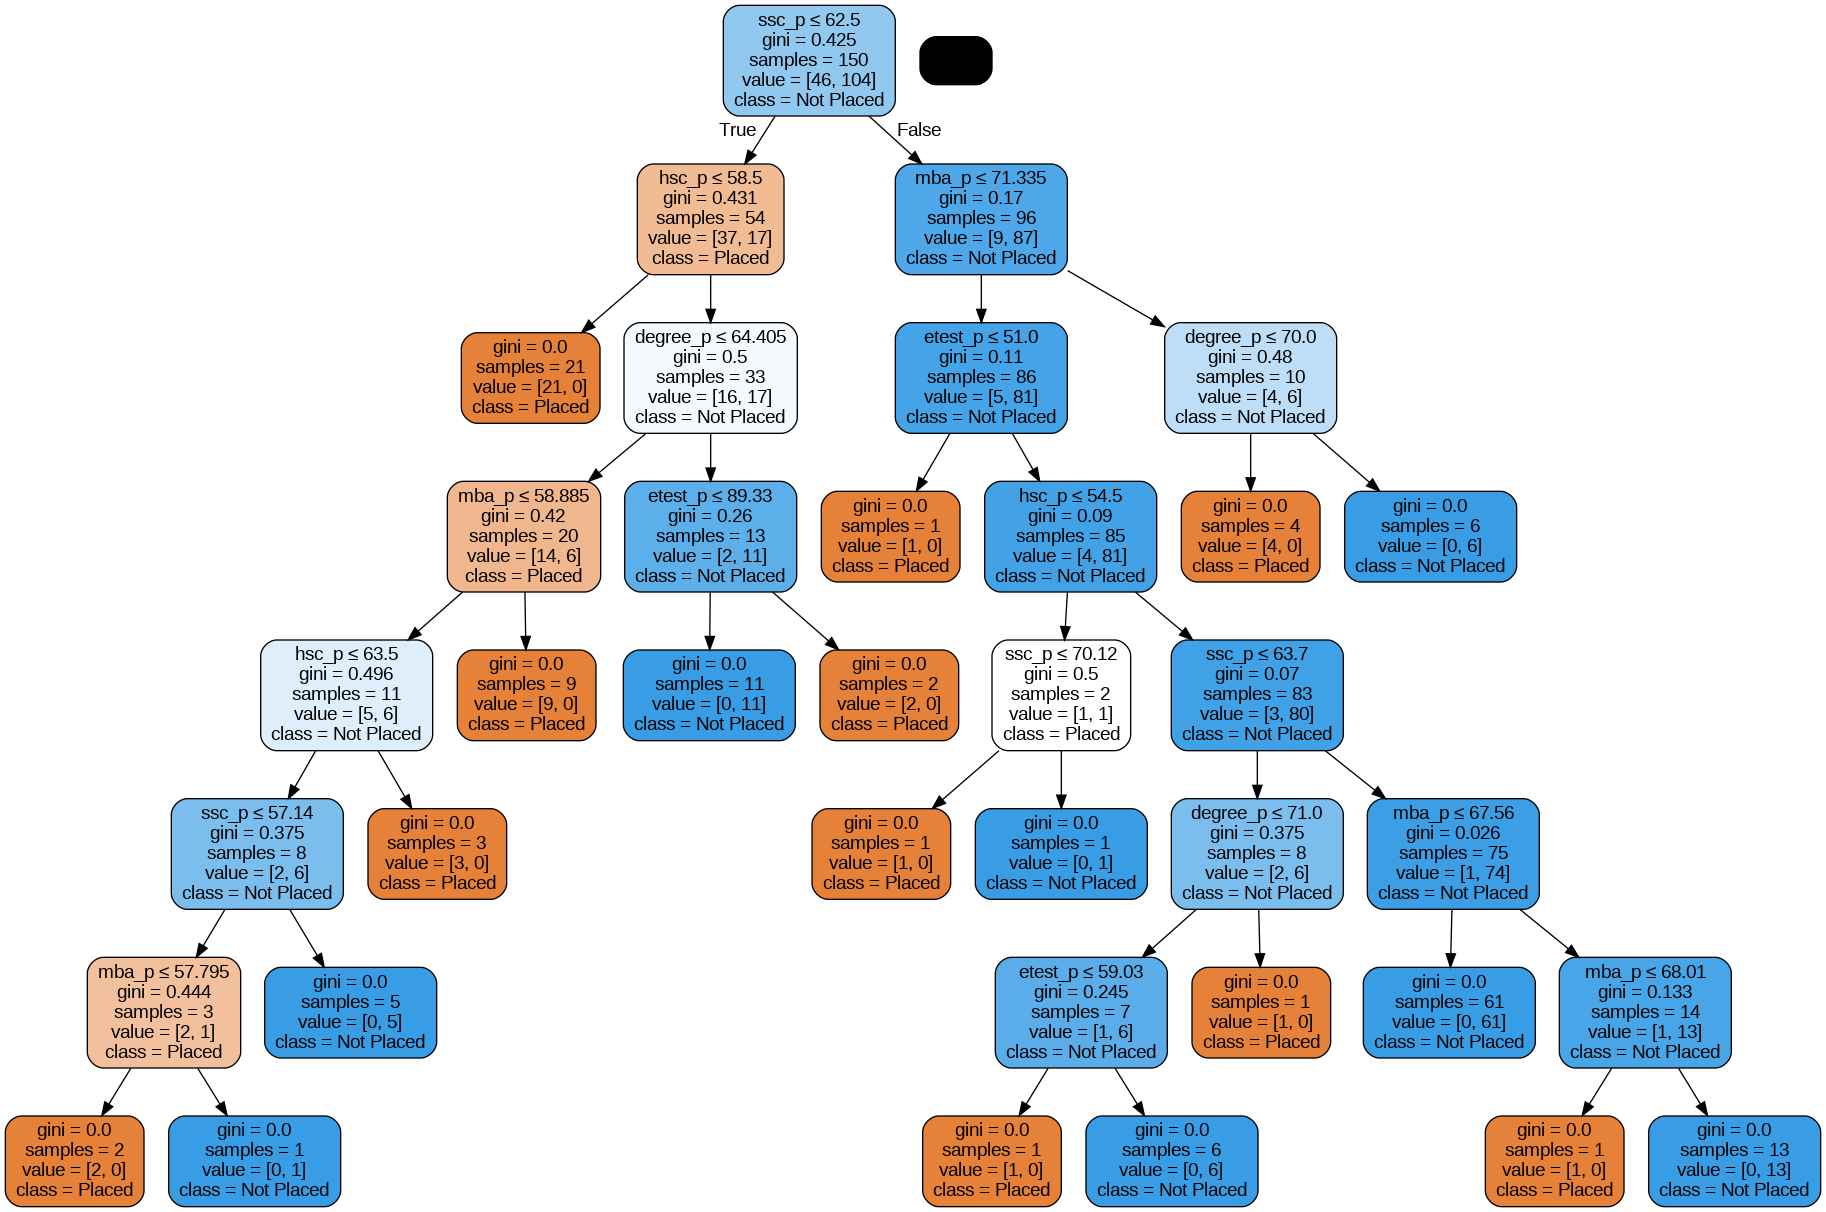

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names =x ,class_names=y)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [ ]:
x=df.drop(columns='status')
x

In [ ]:
y=df['status']
y